In [1]:
!pip install pandas scikit-learn tensorflow matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
print(data.head())

# Print column names to ensure correct names
print(data.columns)

# Print summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      

In [3]:
# Encode species labels to integers
data['Species'] = data['Species'].astype('category').cat.codes

# Separate features and target
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data['Species'].values

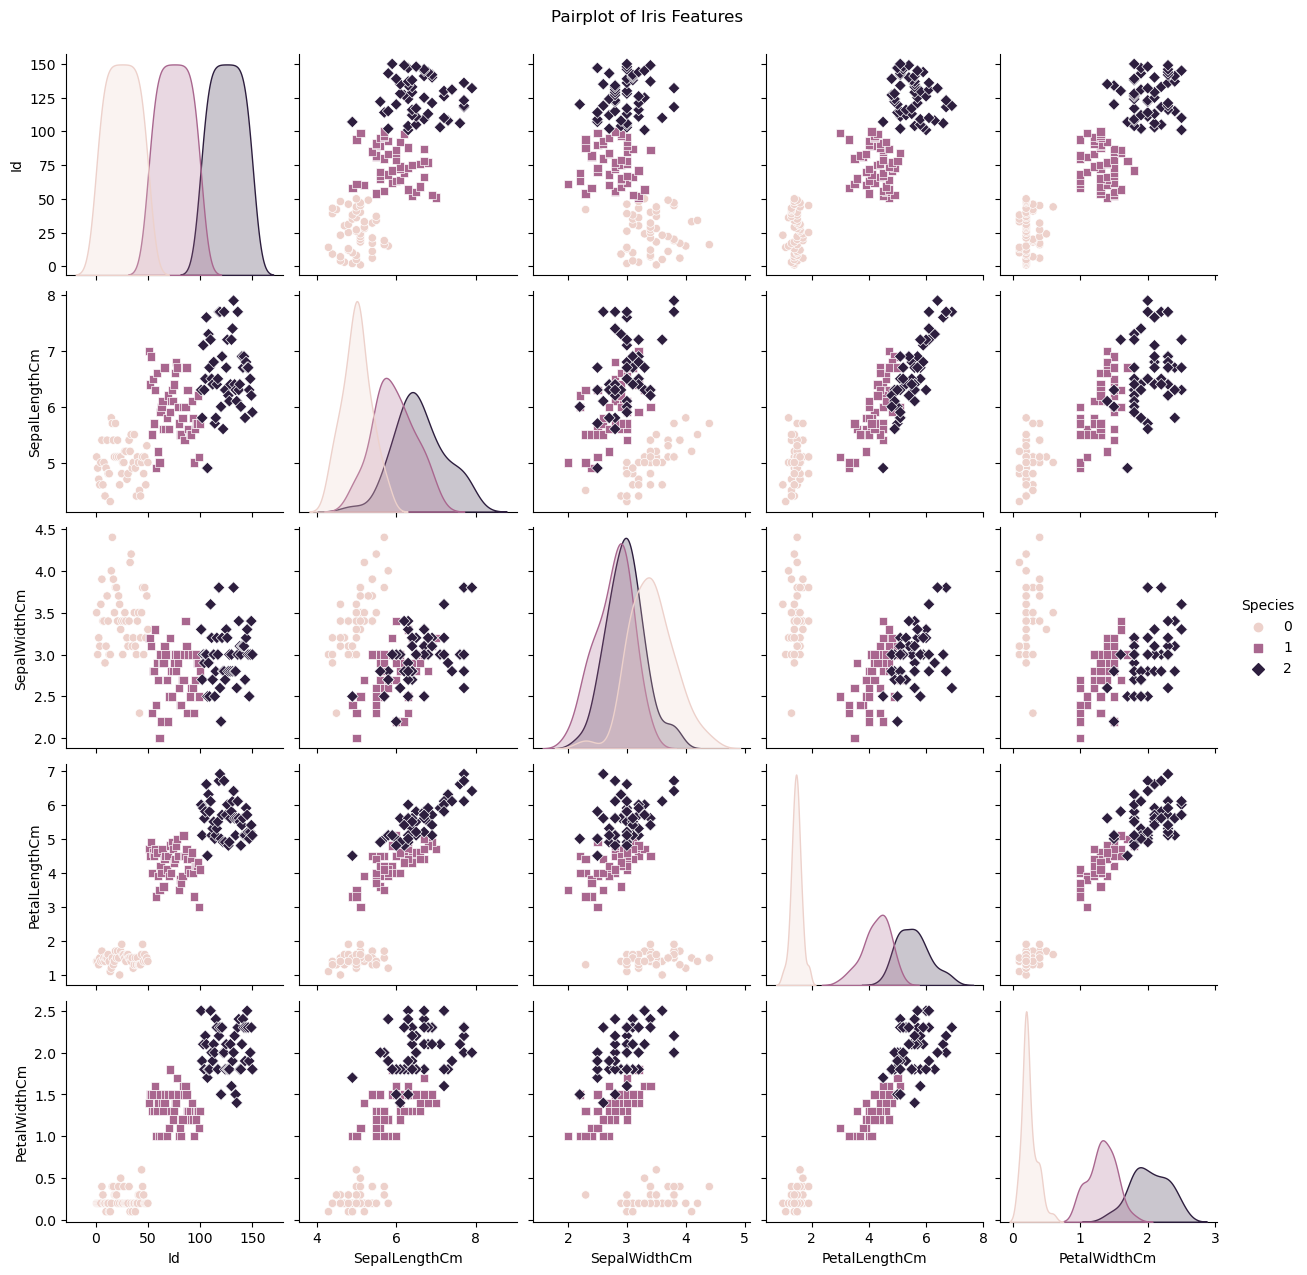

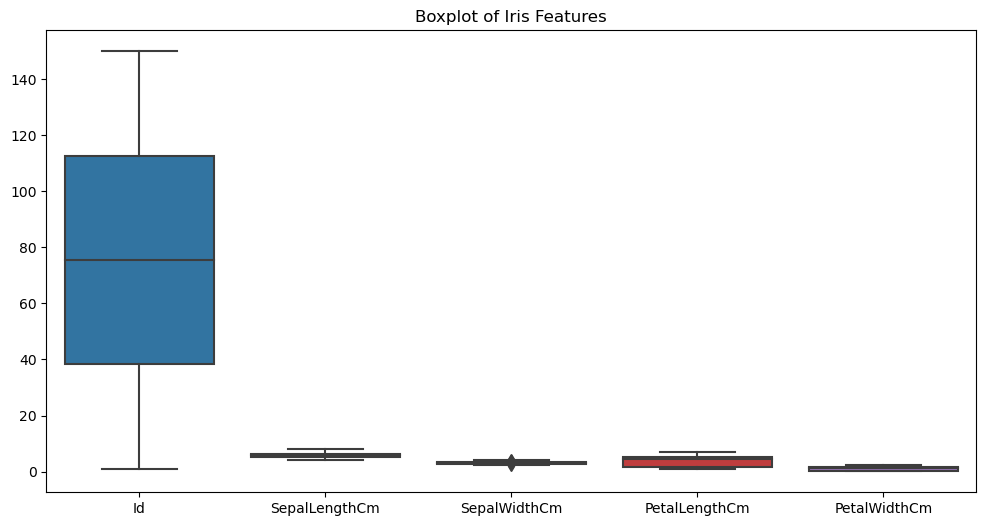

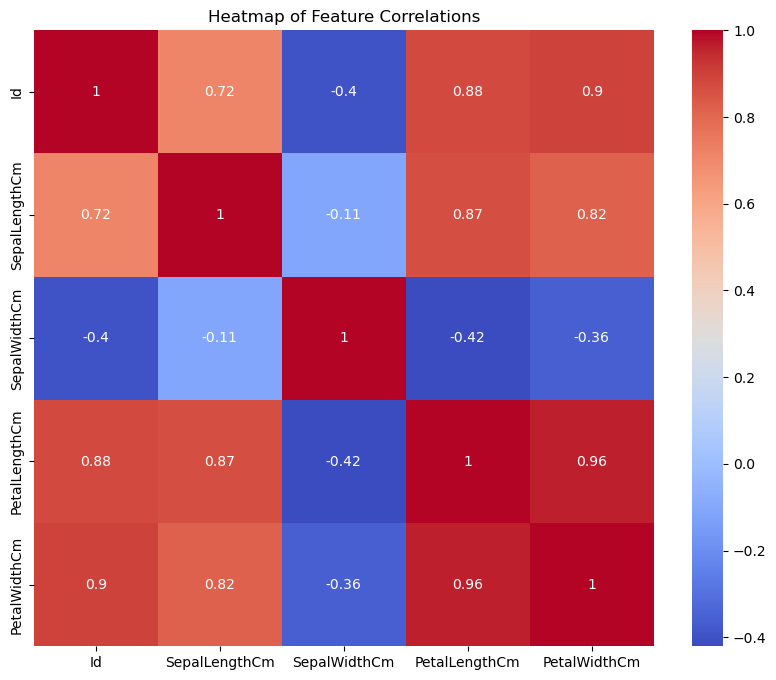

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(data, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns='Species'))
plt.title('Boxplot of Iris Features')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = data.drop(columns='Species').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Defaulting to user installation because normal site-packages is not writeable


C:\Users\urpar\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.3138 - loss: 1.1851 - val_accuracy: 0.1250 - val_loss: 1.1891
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3060 - loss: 1.1606 - val_accuracy: 0.1250 - val_loss: 1.1666
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2917 - loss: 1.1338 - val_accuracy: 0.1250 - val_loss: 1.1461
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2435 - loss: 1.1159 - val_accuracy: 0.0833 - val_loss: 1.1270
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2318 - loss: 1.1145 - val_accuracy: 0.1250 - val_loss: 1.1082
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2526 - loss: 1.0959 - val_accuracy: 0.2500 - val_loss: 1.0908
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2409 - loss: 1.0833 - val_accuracy: 0.2500 - val_loss: 1.0743
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3021 - loss: 1.0635 - val_accuracy: 0.2083 - val_loss: 1.0590

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8667 - loss: 0.5677
Test Accuracy: 86.67%


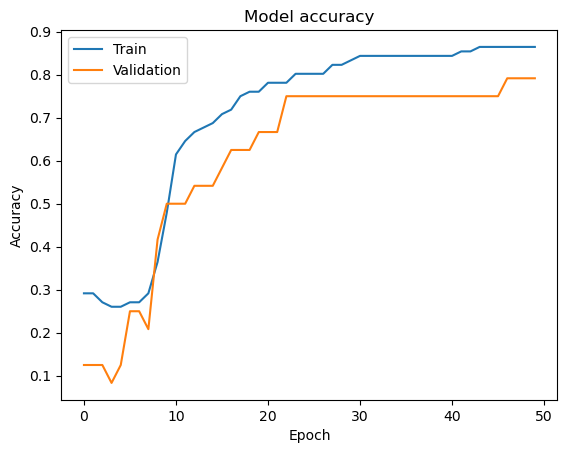

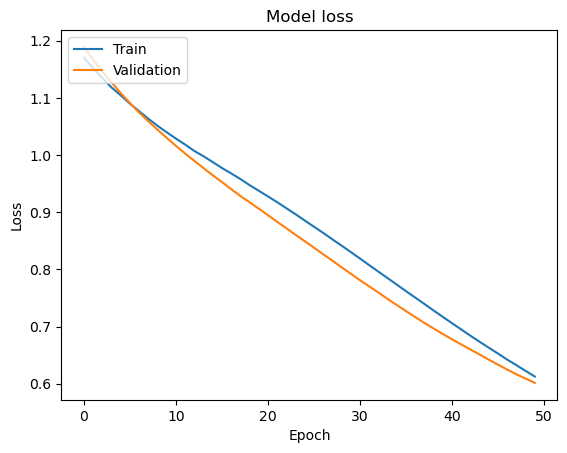

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


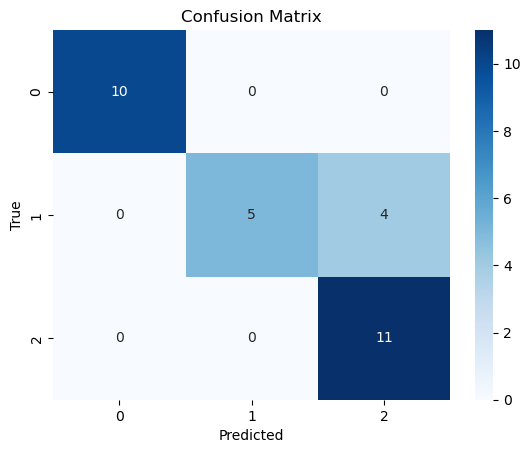

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [11]:
# Classify a new random example
random_example = np.array([[6.7, 3.3, 5.7, 2.5]])  # Example values for SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
random_example_scaled = scaler.transform(random_example)
prediction = np.argmax(model.predict(random_example_scaled), axis=1)
print(f"Predicted class for the random example: {prediction[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted class for the random example: 2
